In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Huts dataset

In [4]:
index = 7

In [5]:
huts = cv2.imread("./data/single_buildings/building_mask_%d.png" % index)

In [6]:
with open('./data/single_buildings/building_coords.csv') as f:
    all_coords = f.readlines()
all_coords = [x.strip().split(',')[1:] for x in all_coords]

In [7]:
coords = all_coords[index]
coords = [float(x) for x in coords]

In [8]:
coords_x = coords[0::2]

In [9]:
coords_y = coords[1::2]

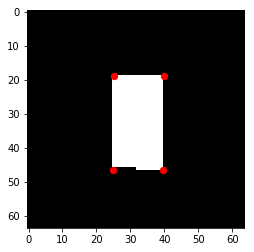

In [10]:
plt.imshow(huts)
plt.scatter(coords_x, coords_y, c = 'r', s = 40)
plt.show()

## Inira dataset

In [95]:
image = cv2.imread('./data/AerialImageDataset/train/gt/austin10.tif')

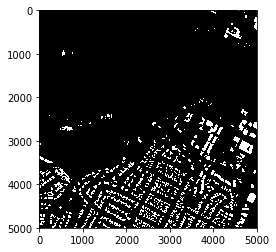

In [96]:
plt.imshow(image)
plt.show()

In [97]:
img = image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#find Harris corners
gray = np.float32(gray)

dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)

#find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

#define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
#here u can get corners
print (corners)

#Now draw them
# res = np.hstack((centroids,corners)) 
# res = np.int0(res) 
# img[res[:,1],res[:,0]]=[0,0,255] 
# img[res[:,3],res[:,2]] = [0,255,0]
# cv2.imwrite('1.png',img)

[[ 2.4987590e+03  2.4929893e+03]
 [ 3.8456655e+03  2.2376995e-01]
 [ 4.0115996e+03 -7.5279810e-02]
 ...
 [ 3.7423843e+03  4.9990771e+03]
 [ 3.7783599e+03  4.9990806e+03]
 [ 3.7856497e+03  4.9987891e+03]]


In [98]:
# fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
# plt.figure(figsize=(8,8))
# plt.imshow(image)
# plt.scatter(corners[1:,0],corners[1:,1], c = 'r', s = 2)
# fig.savefig('processed_corners.')   # save the figure to file
# plt.close(fig)    # close the figure

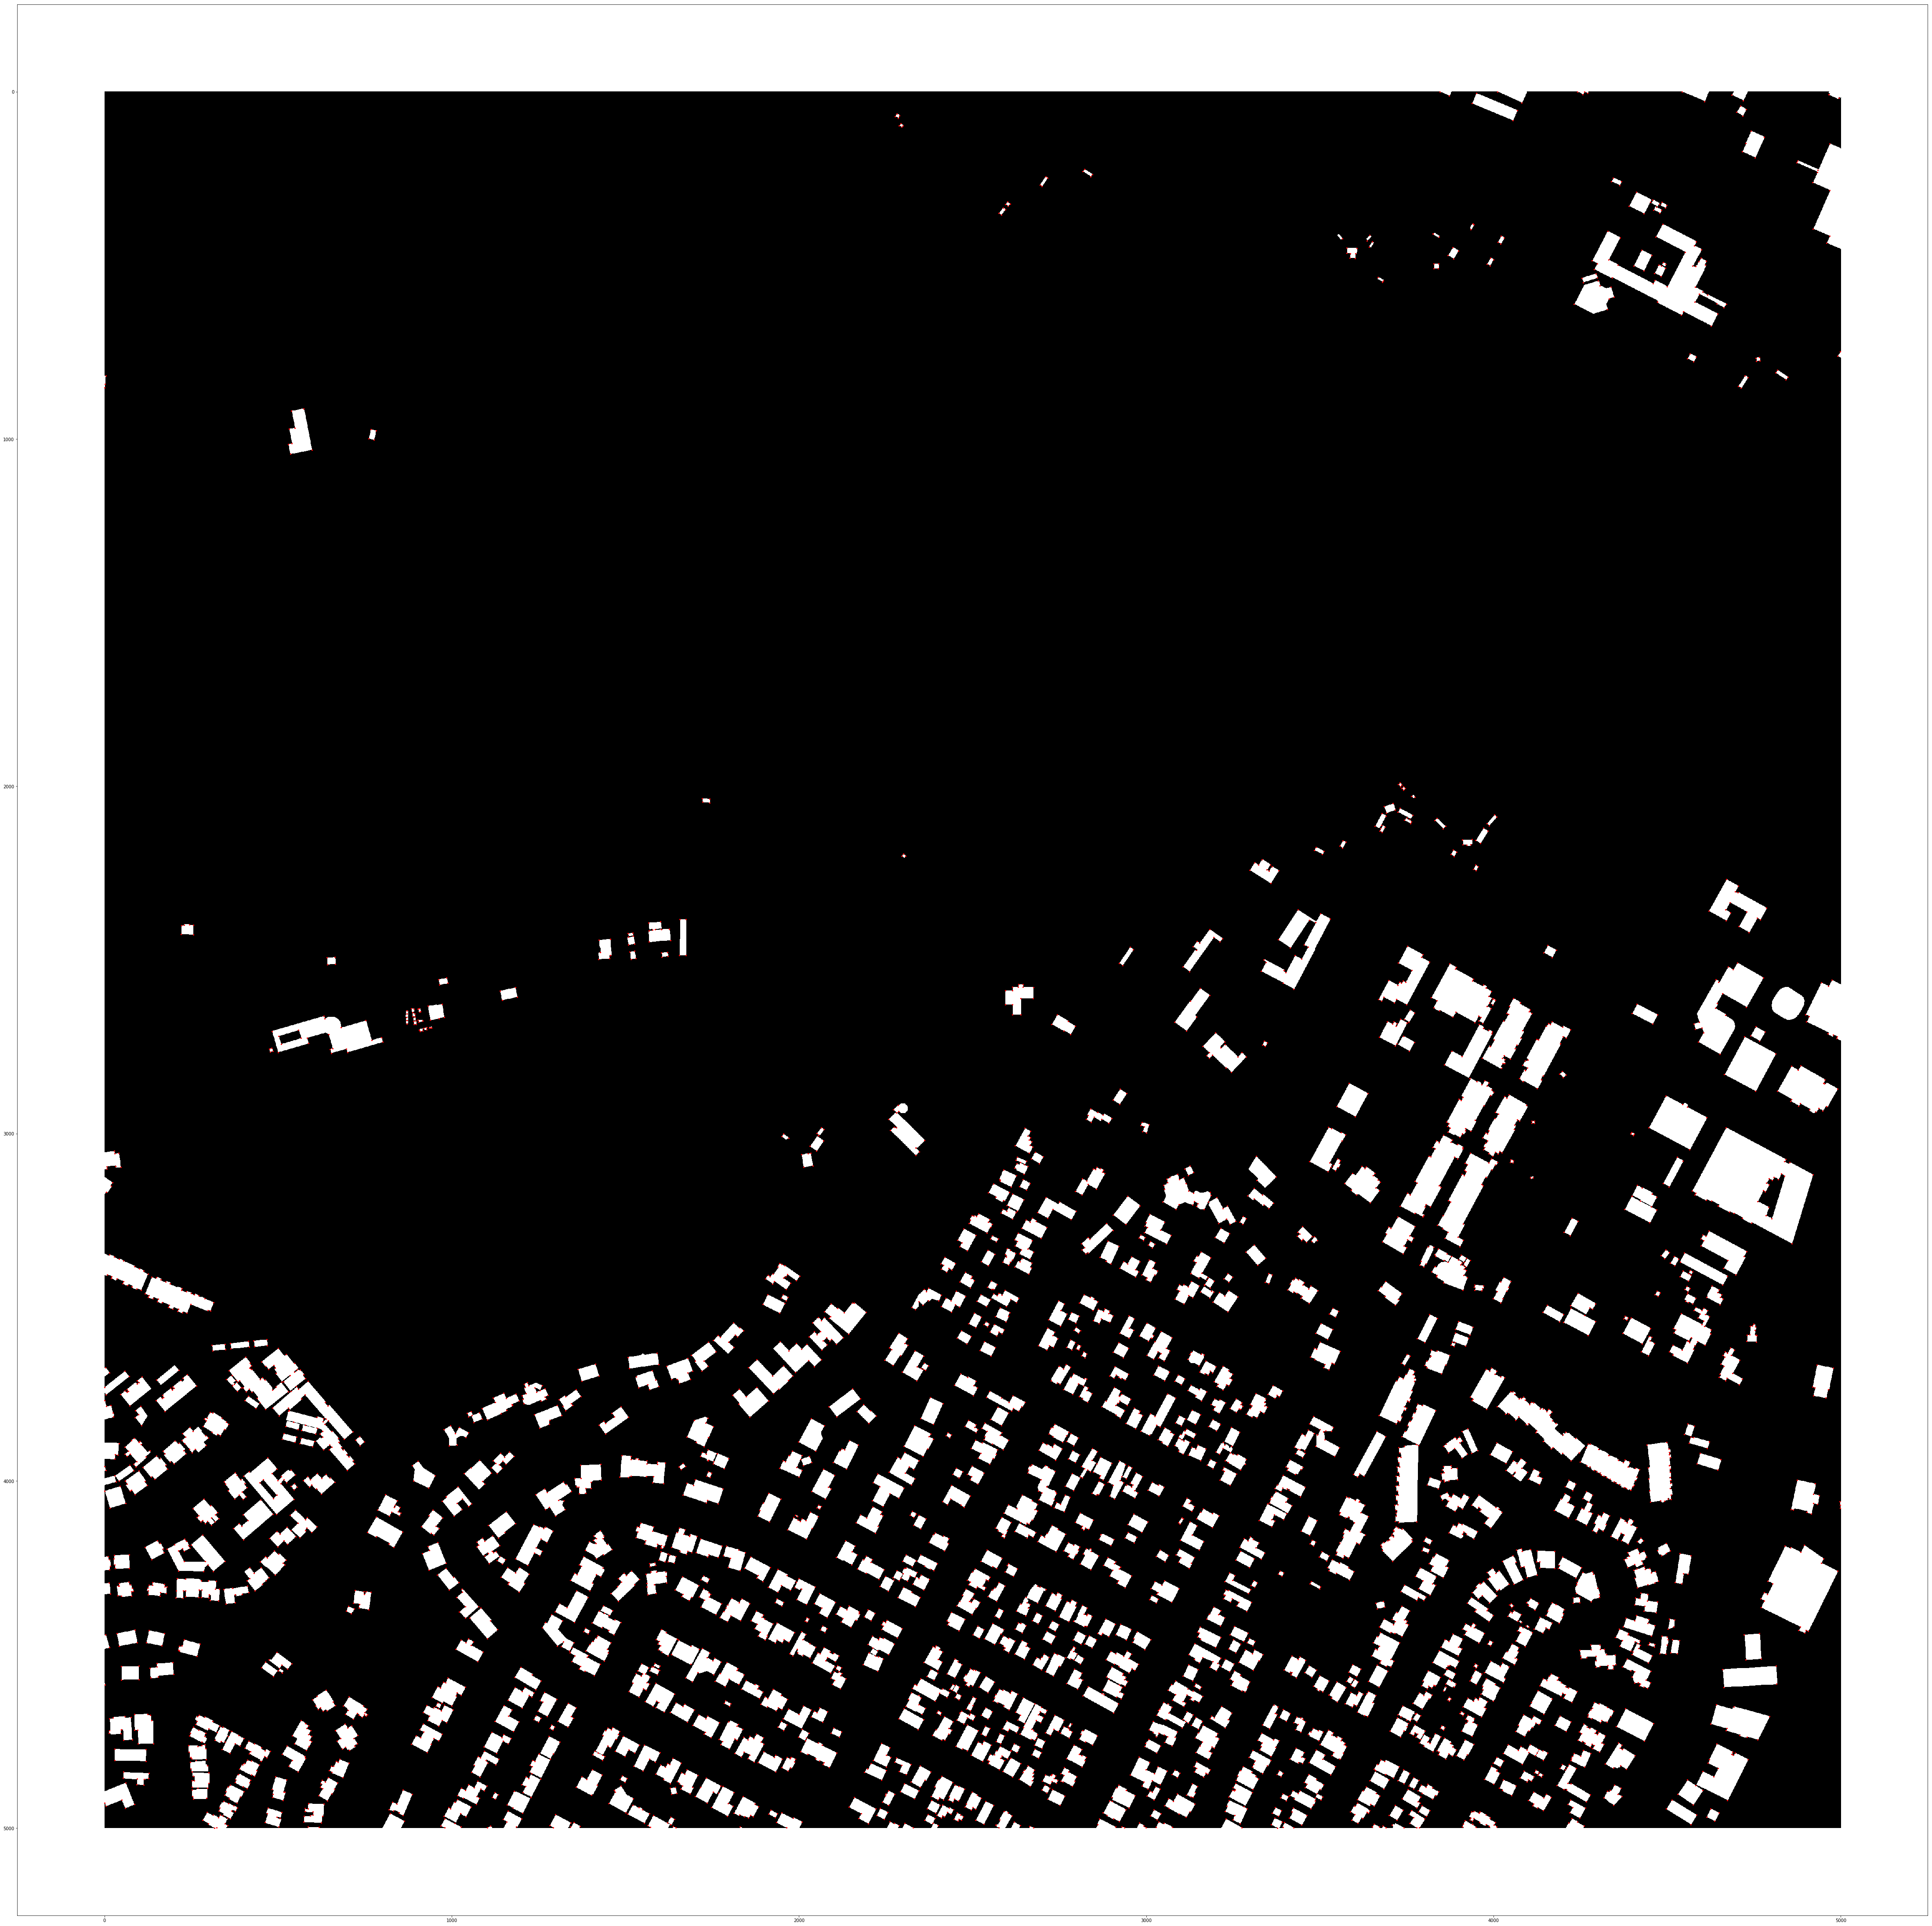

In [99]:
plt.figure(figsize=(80,80))
plt.imshow(image)
plt.scatter(corners[1:,0],corners[1:,1], c = 'r', s = 5)
plt.savefig('./processed.png')

# Instance segmentation using contour plots.

In [240]:
img = np.copy(image[4500:5000,0:500]) #Image matrix

In [256]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Convert any colors to B/W

#find contour levels.
ret, thresh = cv2.threshold(gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_TC89_KCOS)
output = 5
contours2 = cv2.approxPolyDP(contours[2], 2, True)


# #Harrison corner detection plots. 
# gray = np.float32(gray)

# dst = cv2.cornerHarris(gray,2,3,0.04)
# dst = cv2.dilate(dst,None)
# ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
# dst = np.uint8(dst)

# #find centroids
# ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# #define the criteria to stop and refine the corners
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
# corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# #here u can get corners
# print (corners)


In [257]:
print(contours2)

[[[342 423]]

 [[333 433]]

 [[333 443]]

 [[329 450]]

 [[343 458]]

 [[341 461]]

 [[362 473]]

 [[371 456]]

 [[366 449]]

 [[370 447]]

 [[377 451]]

 [[382 441]]]


In [258]:
print(hierarchy[0])

[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [ 3  1 -1 -1]
 [ 4  2 -1 -1]
 [ 5  3 -1 -1]
 [ 6  4 -1 -1]
 [ 7  5 -1 -1]
 [ 8  6 -1 -1]
 [ 9  7 -1 -1]
 [10  8 -1 -1]
 [11  9 -1 -1]
 [12 10 -1 -1]
 [13 11 -1 -1]
 [14 12 -1 -1]
 [15 13 -1 -1]
 [16 14 -1 -1]
 [17 15 -1 -1]
 [18 16 -1 -1]
 [19 17 -1 -1]
 [20 18 -1 -1]
 [21 19 -1 -1]
 [22 20 -1 -1]
 [23 21 -1 -1]
 [24 22 -1 -1]
 [25 23 -1 -1]
 [26 24 -1 -1]
 [-1 25 -1 -1]]


In [259]:
print(contours[2].shape)

(39, 1, 2)


In [260]:
print(contours[2])

[[[342 423]]

 [[337 426]]

 [[336 428]]

 [[333 433]]

 [[332 436]]

 [[331 441]]

 [[332 441]]

 [[333 443]]

 [[332 445]]

 [[329 450]]

 [[332 452]]

 [[334 453]]

 [[343 458]]

 [[341 461]]

 [[344 463]]

 [[362 473]]

 [[364 470]]

 [[365 468]]

 [[368 463]]

 [[371 456]]

 [[368 455]]

 [[365 451]]

 [[366 449]]

 [[368 447]]

 [[370 447]]

 [[377 451]]

 [[378 449]]

 [[380 444]]

 [[382 441]]

 [[380 439]]

 [[377 438]]

 [[374 436]]

 [[372 437]]

 [[370 436]]

 [[359 429]]

 [[355 430]]

 [[353 428]]

 [[346 424]]

 [[344 423]]]


In [261]:
print(img[0:1000,400:600].shape)

(500, 100, 3)


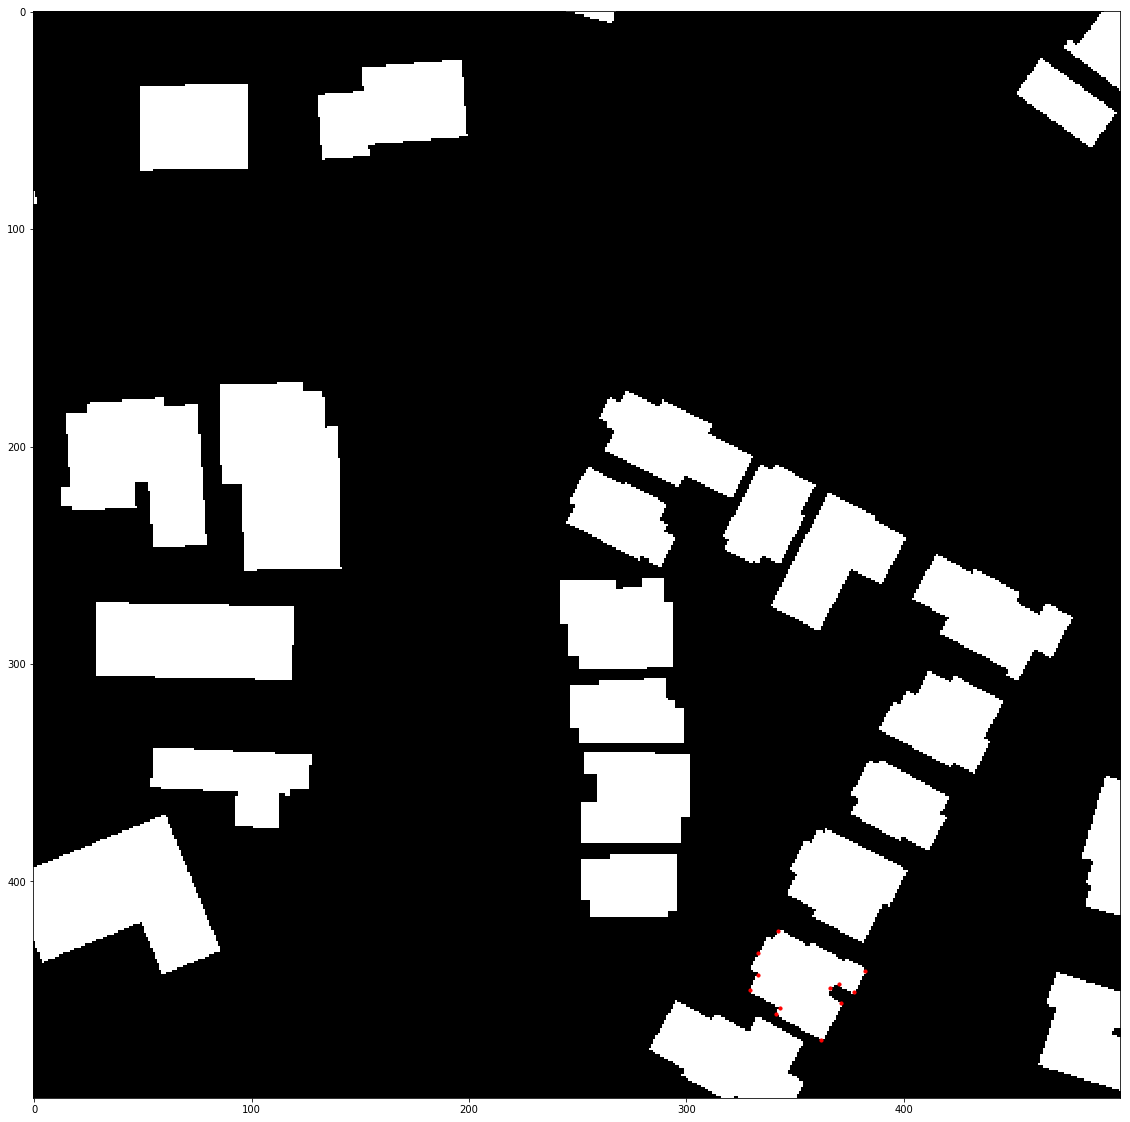

In [262]:
plt.figure(figsize=(20,20))
plt.imshow(img)
for plot in contours2:
    plt.scatter(plot[0][0], plot[0][1], c='r', s=10)
# plt.scatter(corners[1:,0],corners[1:,1], c = 'r', s = 5)
plt.savefig('./processed.png')

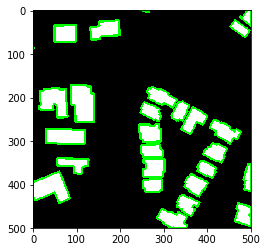

In [106]:
plt.imshow(img,cmap='gray')